In [2]:
# Importando as bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt





# What is the average age of the customers in the database?

In [4]:
customers = pd.read_csv('customers.csv', sep = ';')

customers

,id,age,segment,vintage_group
0,CC25034,35,Diamond,VG1
1,CC59625,22,Diamond,VG1
2,CC69314,33,Diamond,VG1
3,CC67036,46,Diamond,VG1
4,CC25597,44,Diamond,VG1
...,...,...,...,...
5669,CC53430,27,Platinum,VG2
5670,CC31823,33,Platinum,VG2
5671,CC15335,28,Platinum,VG2
5672,CC81556,26,Platinum,VG2


In [5]:
pd.DataFrame( customers )['age'].mean() # média das idades dos clientes 

35.059922453295734

# How is the card_family ranked based on the credit_limit given to each card?

In [6]:
cards = pd.read_csv('cards.csv', sep = ';')

cards[['credit_limit', 'card_family']].groupby('card_family').max() 
# valor máximo por família de cartão

,credit_limit
card_family,
Gold,50000
Platinum,200000
Premium,899000


In [7]:
cards[['credit_limit', 'card_family']].groupby('card_family').min() 
# valor mínimo por família

,credit_limit
card_family,
Gold,2000
Platinum,51000
Premium,108000


In [55]:
# Família do cartão de acordo com o limite de crédito:
# 2000 < Gold < 50000
# 51000 < Platinum < 107000
# 108000 < Platinum ou Premium < 200000
# 2001000 < Premium < 899000

# For the transactions flagged as fraud, what are the ids of the transactions with the highest value?

In [9]:
frauds = pd.read_csv('frauds.csv', sep = ';') # tabela das fraudes

frauds

,transaction_id,fraud_flag
0,CTID50558449,True
1,CTID55936882,True
2,CTID63762180,True
3,CTID76723439,True
4,CTID21246201,True
...,...,...
104,CTID57993591,True
105,CTID91108283,True
106,CTID30494187,True
107,CTID51301522,True


In [10]:
transactions = pd.read_csv('transactions.csv', sep = ';') # tabela das transações

transactions

,id,card_number,transaction_date,value,segment
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,SEG25
1,CTID45504917,3697-6001-4909-5350,2016-02-11,26726,SEG16
2,CTID47312290,5864-4475-3659-1440,2016-11-01,22012,SEG14
3,CTID25637718,5991-4421-8476-3804,2016-01-28,37637,SEG17
4,CTID66743960,1893-8853-9900-8478,2016-03-17,5113,SEG14
...,...,...,...,...,...
9995,CTID25037573,9157-2802-8374-1145,2016-06-10,44280,SEG18
9996,CTID43832298,7416-4529-6690-5703,2016-05-23,27163,SEG12
9997,CTID56532072,6699-2639-4522-6219,2016-08-06,36424,SEG13
9998,CTID88101446,8341-5263-4582-7396,2016-10-10,8464,SEG14


In [11]:
transactions_frauds = transactions.loc[transactions['id'].isin(frauds['transaction_id'])] 
# selecionando apenas as transações que houveram fraude

transactions_frauds[['id', 'value']].sort_values( by='value', ascending=False ).head(10) 
# exibindo as ids das transações fraudulentas com maior valor


,id,value
600,CTID20567160,49155
9619,CTID15034243,48845
4552,CTID95884307,48588
646,CTID54759604,48567
4142,CTID55429304,48514
2529,CTID29469747,48453
494,CTID76723439,48275
6387,CTID85085771,48186
2214,CTID25962688,45807
2009,CTID60575167,45760


# Analyze whether or not the fraudulent transactions are somehow associated to the other features of the dataset. Explain your results.

In [13]:
cards_frauds = cards.loc[cards['card_number'].isin(transactions_frauds['card_number'])]
# selecionando os cartões dos clientes fraudulentos

cards_frauds

,card_number,card_family,credit_limit,customer_id
14,7214-4915-6387-5429,Platinum,172000,CC72302
18,6239-8641-8524-9441,Gold,26000,CC18438
22,6228-9033-3508-8121,Gold,33000,CC36771
23,1466-1600-9312-7604,Premium,249000,CC60926
26,7586-6475-9618-3909,Gold,37000,CC51908
...,...,...,...,...
460,1947-8327-3848-6581,Platinum,113000,CC11690
461,9018-5320-5729-5393,Premium,444000,CC54582
463,2949-1972-1300-6680,Gold,45000,CC68567
472,5384-8278-5616-5502,Premium,361000,CC83124


In [14]:
# Como a tabela do cards_frauds possui 98 linhas 
# e a tabela frauds(tabela das transações fradulentas) tem 109 linhas
# temos indícios que temos clientes que fizeram mais de uma transação fraudulenta


transactions_frauds[['card_number']].value_counts().head(12)
# Confirmando e exibindo os cartões que tiveram mais de uma transação fraudulenta

card_number        
1175-3754-1370-5515    2
9030-1667-6058-6173    2
7697-2274-6431-6408    2
3620-5235-2101-3391    2
3440-3330-5015-4988    2
3295-6390-4452-7199    2
8231-5519-1948-3400    2
2017-7197-7814-9950    2
6228-9033-3508-8121    2
9604-6821-2861-8084    2
1290-5480-3763-3387    2
4856-2191-9879-6388    1
dtype: int64

In [16]:
age_frauds = customers.loc[customers['id'].isin(cards_frauds['customer_id'])]
# Filtrando as idades dos clientes fraudulentos


age_frauds

,id,age,segment,vintage_group
143,CC35402,26,Diamond,VG1
173,CC42497,23,Diamond,VG1
209,CC41731,35,Diamond,VG1
221,CC93075,32,Diamond,VG1
235,CC64111,41,Diamond,VG1
...,...,...,...,...
5476,CC87034,36,Platinum,VG2
5534,CC87270,28,Platinum,VG2
5538,CC81000,25,Platinum,VG2
5548,CC66351,22,Platinum,VG2


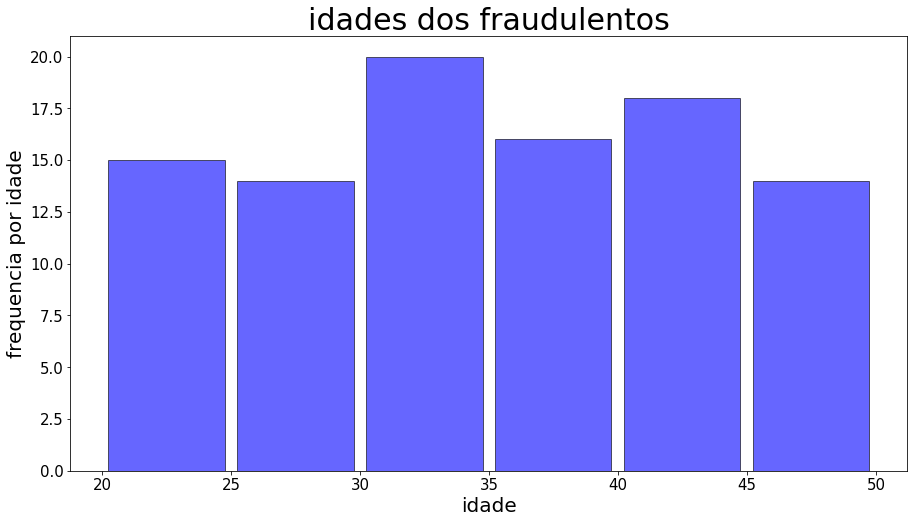

In [45]:
plt.figure(figsize = (15,8))
plt.title('idades dos fraudulentos',fontsize=30)
plt.xlabel('idade', fontsize=20)
plt.ylabel('frequencia por idade',fontsize=20)
plt.tick_params(labelsize=15)
plt.hist(age_frauds['age'] ,6 ,rwidth=0.9, color='blue', alpha=0.6, ec='k' )
plt.show()

In [51]:
a = age_frauds[['age']].value_counts()
b = customers[['age']].value_counts()
((a/b)*100).sort_values(ascending=False)

# Mostrando a porcentagem de fraudulentos por idade

age
30     4.166667
42     4.022989
41     3.723404
29     2.604167
32     2.439024
22     2.380952
39     2.339181
24     2.234637
48     2.173913
23     2.162162
35     2.139037
26     1.796407
33     1.764706
31     1.724138
37     1.621622
36     1.538462
50     1.477833
27     1.401869
46     1.149425
34     1.117318
43     1.111111
49     1.081081
38     1.052632
47     1.047120
20     1.036269
25     1.020408
28     0.609756
44     0.584795
21     0.584795
45     0.546448
40     0.531915
dtype: float64

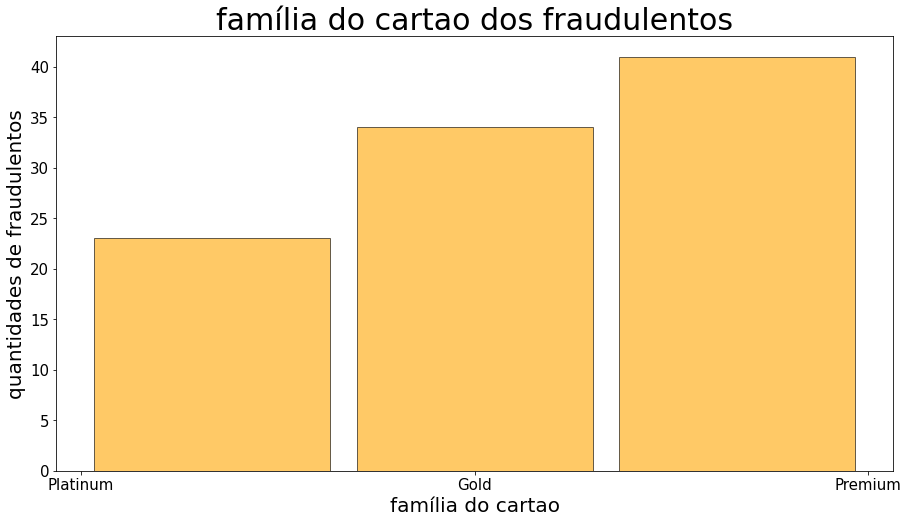

In [46]:
plt.figure(figsize = (15,8))
plt.title('família do cartao dos fraudulentos', fontsize=30)
plt.xlabel('família do cartao', fontsize=20)
plt.ylabel('quantidades de fraudulentos', fontsize=20)
plt.tick_params(labelsize=15)
plt.hist(cards_frauds['card_family'] ,3 ,rwidth=0.9, color='orange', alpha=0.6, ec='k' )
plt.show()


In [52]:
c = cards_frauds[['card_family']].value_counts()
d = cards[['card_family']].value_counts()
((c/d)*100).sort_values(ascending=False)

#Mostrando a porcentagem de fraudes por família de cartão 

card_family
Platinum       20.535714
Premium        19.806763
Gold           18.784530
dtype: float64

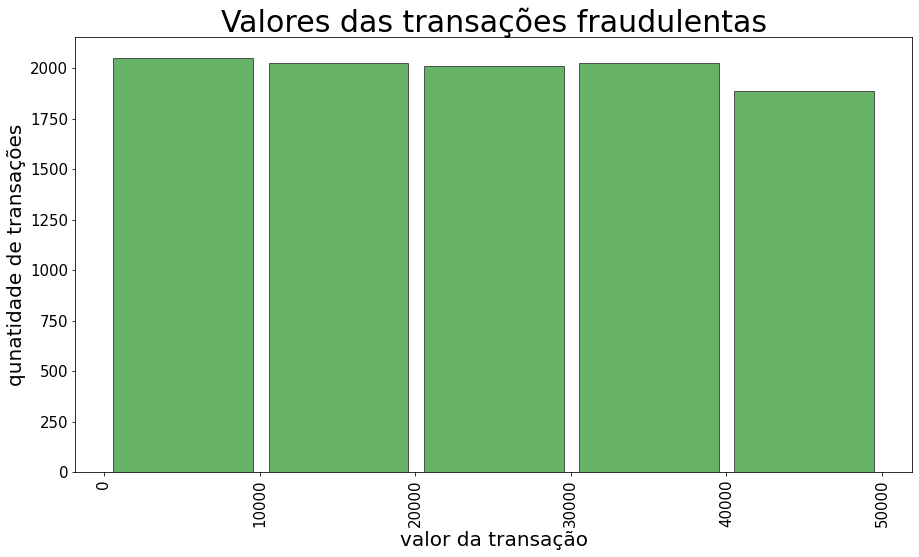

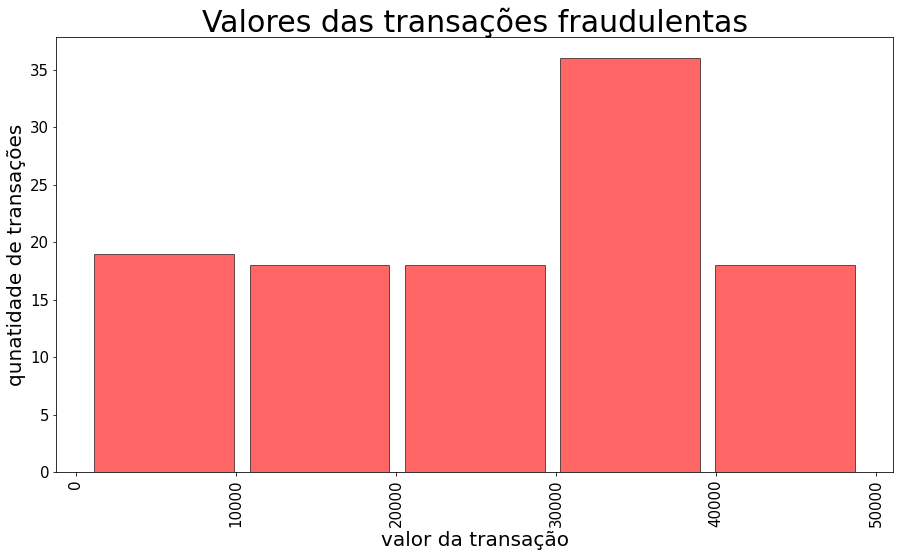

In [84]:
plt.figure(figsize = (15,8))
plt.title('Valores das transações fraudulentas',fontsize=30)
plt.xlabel('valor da transação', fontsize=20)
plt.ylabel('qunatidade de transações',fontsize=20)
plt.tick_params(labelsize=15)
plt.hist(transactions[['value']] ,5 ,rwidth=0.9, color='green', alpha=0.6, ec='k' )
plt.xticks(rotation=90)

plt.figure(figsize = (15,8))
plt.title('Valores das transações fraudulentas',fontsize=30)
plt.xlabel('valor da transação', fontsize=20)
plt.ylabel('qunatidade de transações',fontsize=20)
plt.tick_params(labelsize=15)
plt.hist(transactions_frauds[['value']] ,5 ,rwidth=0.9, color='red', alpha=0.6, ec='k' )
plt.xticks(rotation=90)

plt.show()

In [85]:
# pelos gráficos podemos inferir que a porcentagem de transações fraudulentas 
# entre os valores de 30000 e 40000 são maiores do que nos outros intervalos

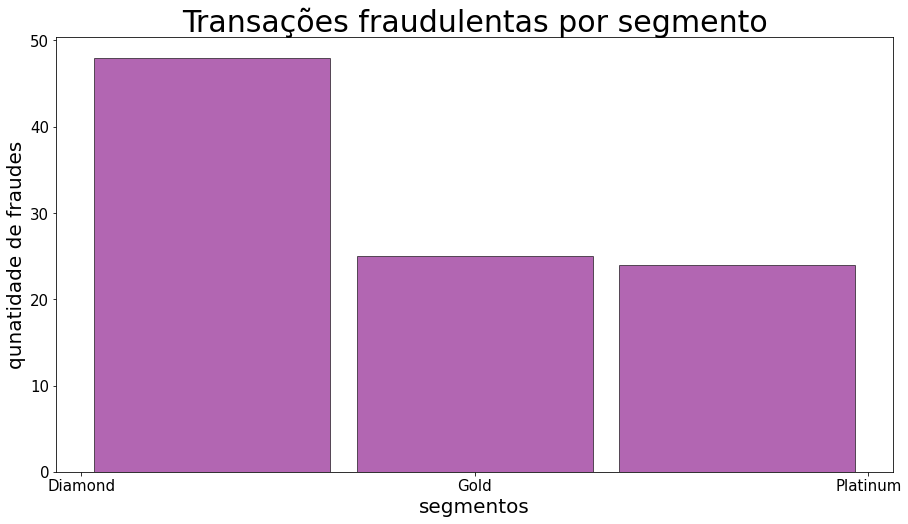

In [67]:
plt.figure(figsize = (15,8))
plt.title('Transações fraudulentas por segmento',fontsize=30)
plt.xlabel('segmentos', fontsize=20)
plt.ylabel('qunatidade de fraudes',fontsize=20)
plt.tick_params(labelsize=15)
plt.hist(age_frauds['segment'] ,3 ,rwidth=0.9, color='purple', alpha=0.6, ec='k' )
plt.show()

In [59]:
g = age_frauds[['segment']].value_counts()
h = customers[['segment']].value_counts()
((g/h)*100).sort_values(ascending=False)

# Porcentagem fraudes por segmento(segment)

segment 
Diamond     1.901743
Platinum    1.830664
Gold        1.359434
dtype: float64